In [1]:
import pandas as pd
import os

os.chdir('./binding_pose_MD/1/analysis')

df = pd.read_csv('./avg.dat',delim_whitespace=True)
df.to_excel('average_h_bond.xlsx')

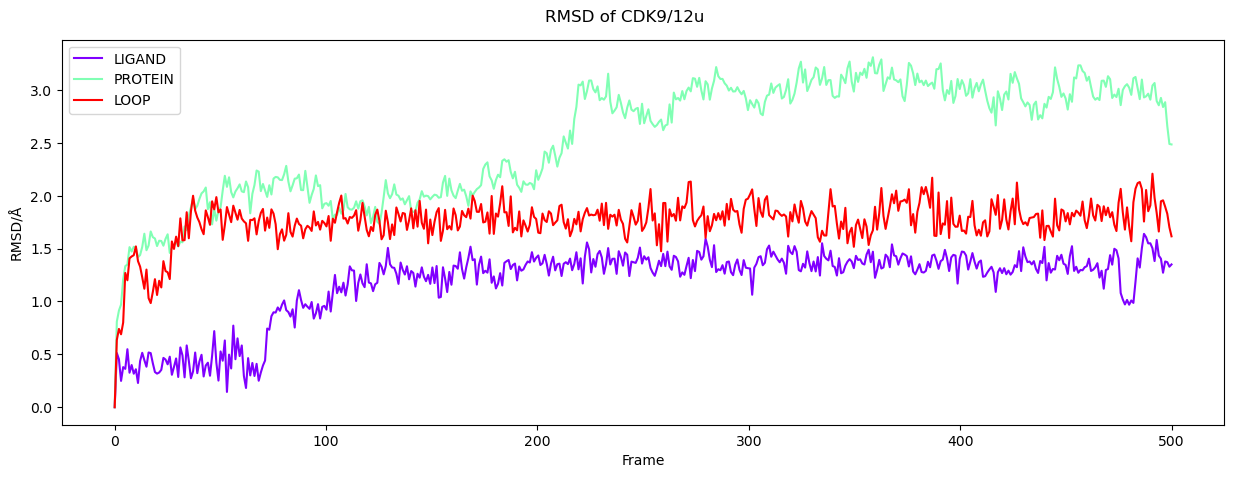

In [2]:
from glob import glob
from matplotlib import pyplot as plt
import numpy as np

path = f"./*.dat"
list_rmsd = []
label = []

for filename in glob(path):

    if filename.split("/")[1].split(".")[0].startswith("RMSD_"):
        list_rmsd.append(np.loadtxt(filename,usecols=1))
        label.append(filename.split("/")[1].split(".")[0].split("_")[1])

colors = plt.cm.rainbow(np.linspace(0, 1, len(label)))

fig,ax = plt.subplots(1,1,sharex=True,figsize=(15,5))
fig.suptitle('RMSD of CDK9/12u', x=0.5, y=0.94)


X = np.linspace(0,len(list_rmsd[0])//10,len(list_rmsd[0])//10)
ax.set_ylabel('RMSD/Å')
ax.set_xlabel('Frame')
for i in range(len(list_rmsd)):
    ax.plot(X,list_rmsd[i][0:len(list_rmsd[i]):10],label=label[i],c=colors[i])

plt.legend()
plt.savefig('p.tiff', dpi=300, format='tiff')